# 毕业论文`GRAD`
## 计算贡献值

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

* 观测值的summer与autumn之差包含了MET与EMIS的作用；
* 模拟的summer和试验之差，代表的MET的作用
* 模拟的autumn和试验之差，代表了EMIS的作用

In [2]:
df_summer = pd.read_excel(datadir + 'Contribution/contribution_hours_Seasonally/summer.xlsx',index_col=0)
df_autumn = pd.read_excel(datadir + 'Contribution/contribution_hours_Seasonally/autumn.xlsx',index_col=0)
df_sensit = pd.read_excel(datadir + 'Contribution/contribution_hours_Seasonally/sensit.xlsx',index_col=0)

In [3]:
df_summer

,sim_2019,obs_2019,sim_2021,obs_2021,sim_2022,obs_2022
2023-07-01 00:00:00,81.546791,30.333333,48.842762,37.525000,37.032146,19.871795
2023-07-01 01:00:00,73.982719,29.555556,50.059521,37.000000,37.215488,19.948052
2023-07-01 02:00:00,68.079628,26.611111,49.052711,36.412500,38.723022,21.666667
2023-07-01 03:00:00,64.116791,22.962963,46.282948,35.875000,40.742958,22.662162
2023-07-01 04:00:00,60.752178,20.358491,42.806480,35.487179,42.465588,22.605263
...,...,...,...,...,...,...
2023-07-31 19:00:00,53.004841,21.090909,132.578583,71.202532,215.039474,184.307692
2023-07-31 20:00:00,52.213676,20.821429,117.405487,56.612500,181.798080,151.641026
2023-07-31 21:00:00,52.929340,20.821429,97.998787,44.139241,148.314804,122.974026
2023-07-31 22:00:00,52.118790,22.357143,82.074982,38.734177,114.630394,101.934211


In [4]:
# calculate MDA8
mda8_summer = df_summer.rolling(8).mean().resample('D').max()
avg_summer = mda8_summer.mean(axis=0)
mda8_autumn = df_autumn.rolling(8).mean().resample('D').max()
avg_autumn = mda8_autumn.mean(axis=0)
mda8_sensit = df_sensit.rolling(8).mean().resample('D').max()
avg_sensit = mda8_sensit.mean(axis=0)

In [5]:
print(avg_summer)
print(avg_autumn)
print(avg_sensit)

sim_2019    153.724012
obs_2019     83.197922
sim_2021    151.341520
obs_2021     98.166182
sim_2022    162.590056
obs_2022    102.445243
dtype: float64
sim_2019    154.018103
obs_2019    133.692824
sim_2021    157.146947
obs_2021    124.396497
sim_2022    166.620089
obs_2022    160.994405
dtype: float64
sim_2019    154.498268
sim_2021    157.944056
sim_2022    169.239094
dtype: float64


In [6]:
obs_list = ['obs_2019','obs_2021','obs_2022']
sim_list = ['sim_2019','sim_2021','sim_2022']
sen_list = sim_list

obs_summer = avg_summer[obs_list].mean()
obs_autumn = avg_autumn[obs_list].mean()
sim_summer = avg_summer[sim_list].mean()
sim_autumn = avg_autumn[sim_list].mean()
sen_autumn = avg_sensit[sen_list].mean()

print('obs_summer  = ',obs_summer,
      '\nobs_autumn = ',obs_autumn,
      '\nsim_summer  = ',sim_summer,
      '\nsim_autumn = ',sim_autumn,
      '\nsen_autumn = ',sen_autumn)

obs_summer  =  94.60311566796946 
obs_autumn =  139.69457536321153 
sim_summer  =  155.8851958705533 
sim_autumn =  159.2617132610745 
sen_autumn =  160.5604724672106


In [11]:
delta_obs           = obs_autumn - obs_summer
delta_summer_with_sen  = sen_autumn - sim_summer
delta_autumn_with_sen = sim_autumn - sen_autumn

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(delta_summer_with_sen),', {:.2f}%'.format(delta_summer_with_sen/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(delta_autumn_with_sen),', {:.2f}%'.format(delta_autumn_with_sen/delta_obs*100))

ΔMET + ΔEMIS = 45.09 
ΔMET = 4.68 , 10.37% 
ΔEMIS = -1.30 , -2.88%


直接对原数据做计算结果太差，要做线性回归

发现日间夜间均偏高，没有必要分两段时间做回归\
同时发现summer年份的模拟偏高更严重，因此应该分summer与autumn做两段回归

In [40]:
sim_summer = df_summer[sim_list].mean(axis=1)
obs_summer = df_summer[obs_list].mean(axis=1)
sim_autumn = df_autumn[sim_list].mean(axis=1)
obs_autumn = df_autumn[obs_list].mean(axis=1)
sim_sensit = df_sensit[sen_list].mean(axis=1)

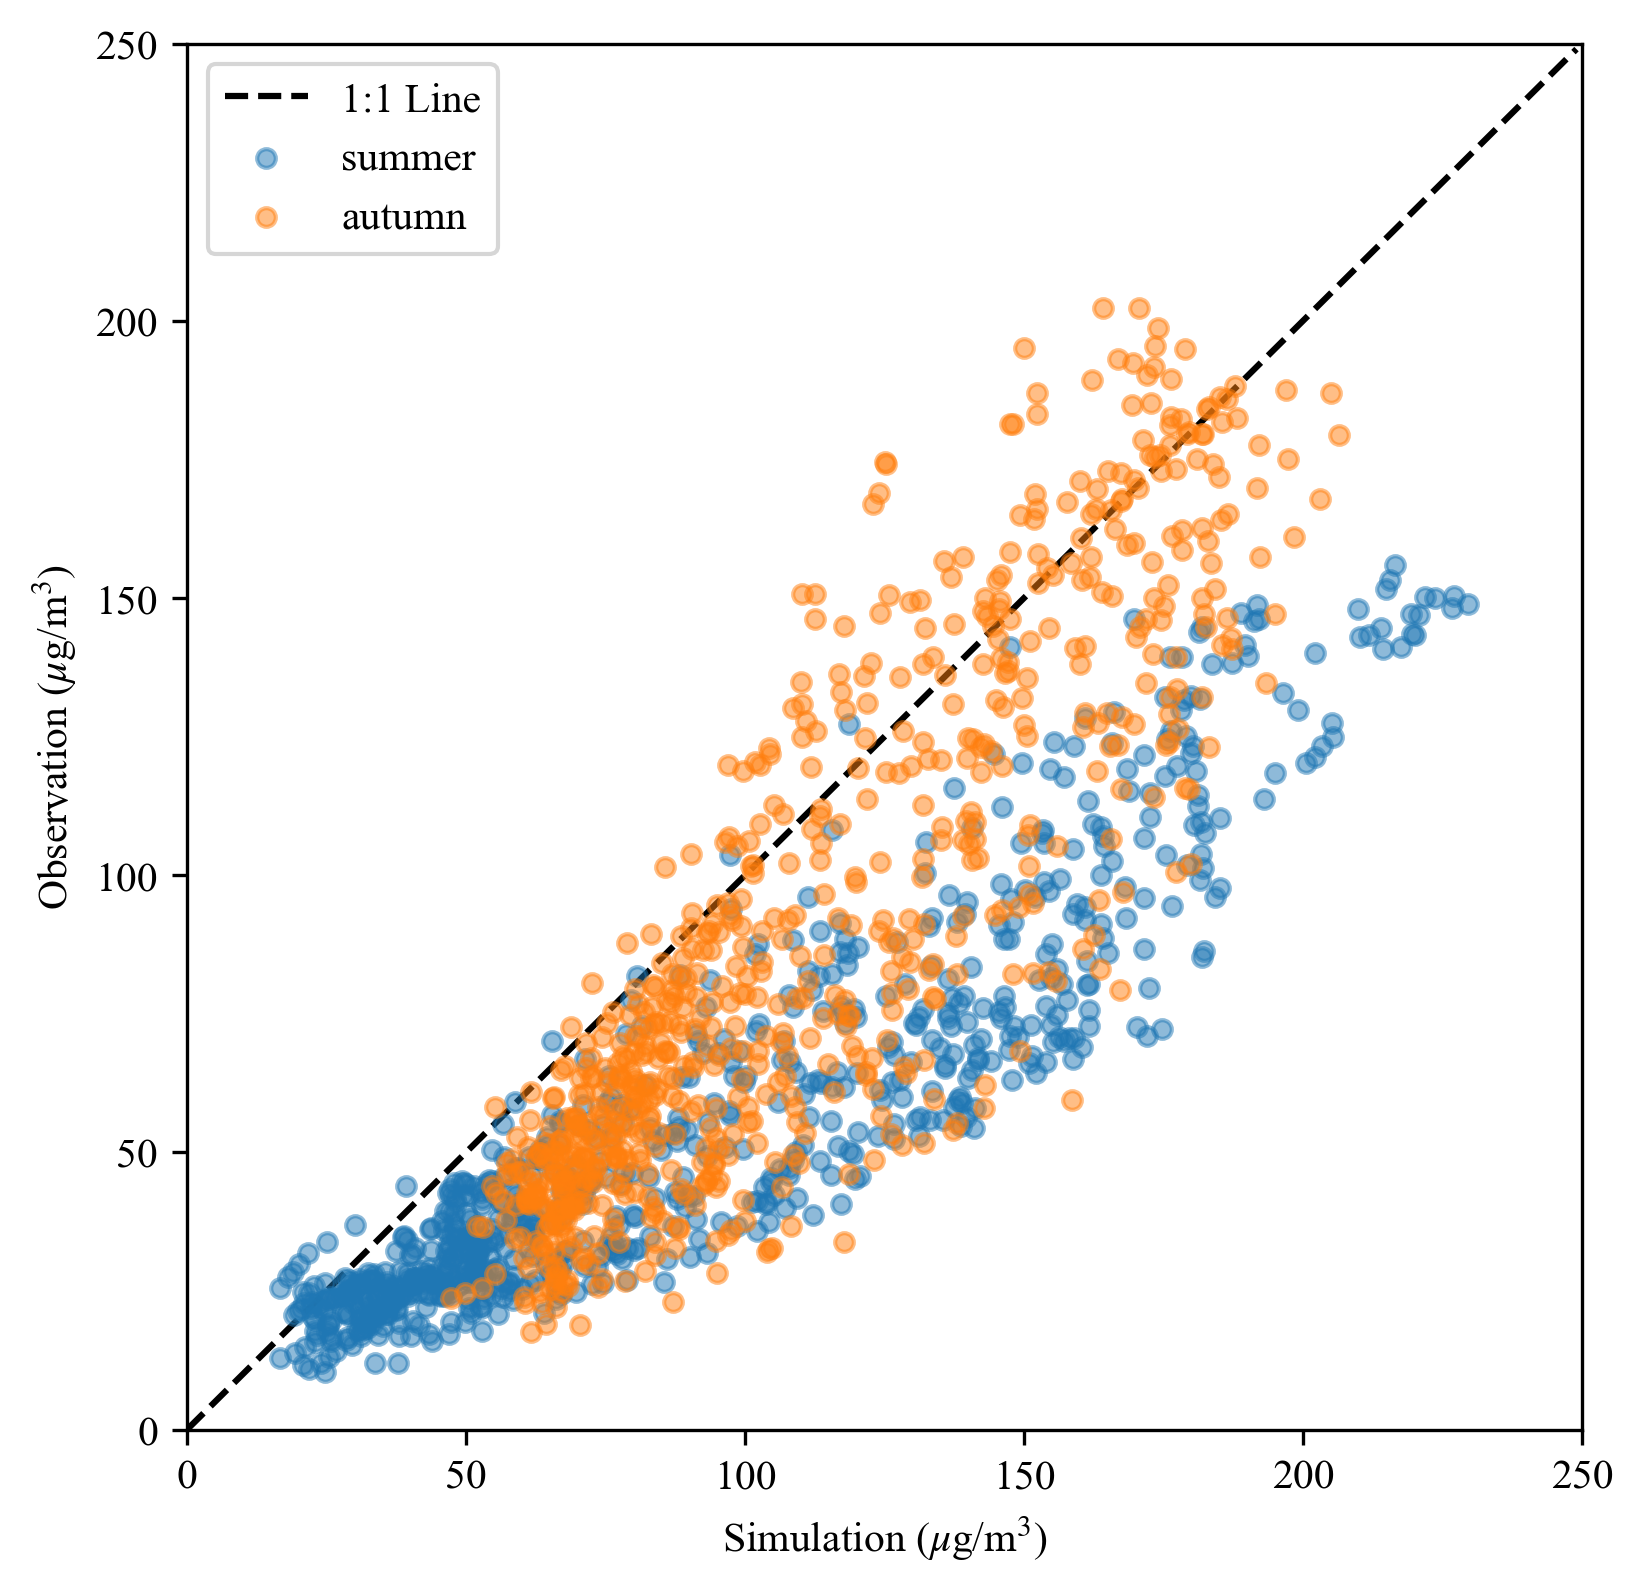

In [41]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
ax.scatter(sim_summer.values, obs_summer.values,label='summer',color='tab:blue',s=20, marker='o',alpha=0.5)
ax.scatter(sim_autumn.values, obs_autumn.values,label='autumn',color='tab:orange',s=20, marker='o',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

In [42]:
slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer = stats.linregress(sim_summer,obs_summer)
slope_autumn, intercept_autumn, r_value_autumn, p_value_autumn, std_err_autumn = stats.linregress(sim_autumn,obs_autumn)

lr_data = {
    'summer': [slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer],
    'autumn': [slope_autumn, intercept_autumn, r_value_autumn, p_value_autumn, std_err_autumn],
}

lr = pd.DataFrame(lr_data, index=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
lr

,summer,autumn
slope,5.960141e-01,1.016011e+00
intercept,1.428391e+00,-2.390127e+01
r_value,9.170971e-01,8.591527e-01
p_value,1.426858e-298,4.209669e-211
std_err,9.511438e-03,2.258384e-02


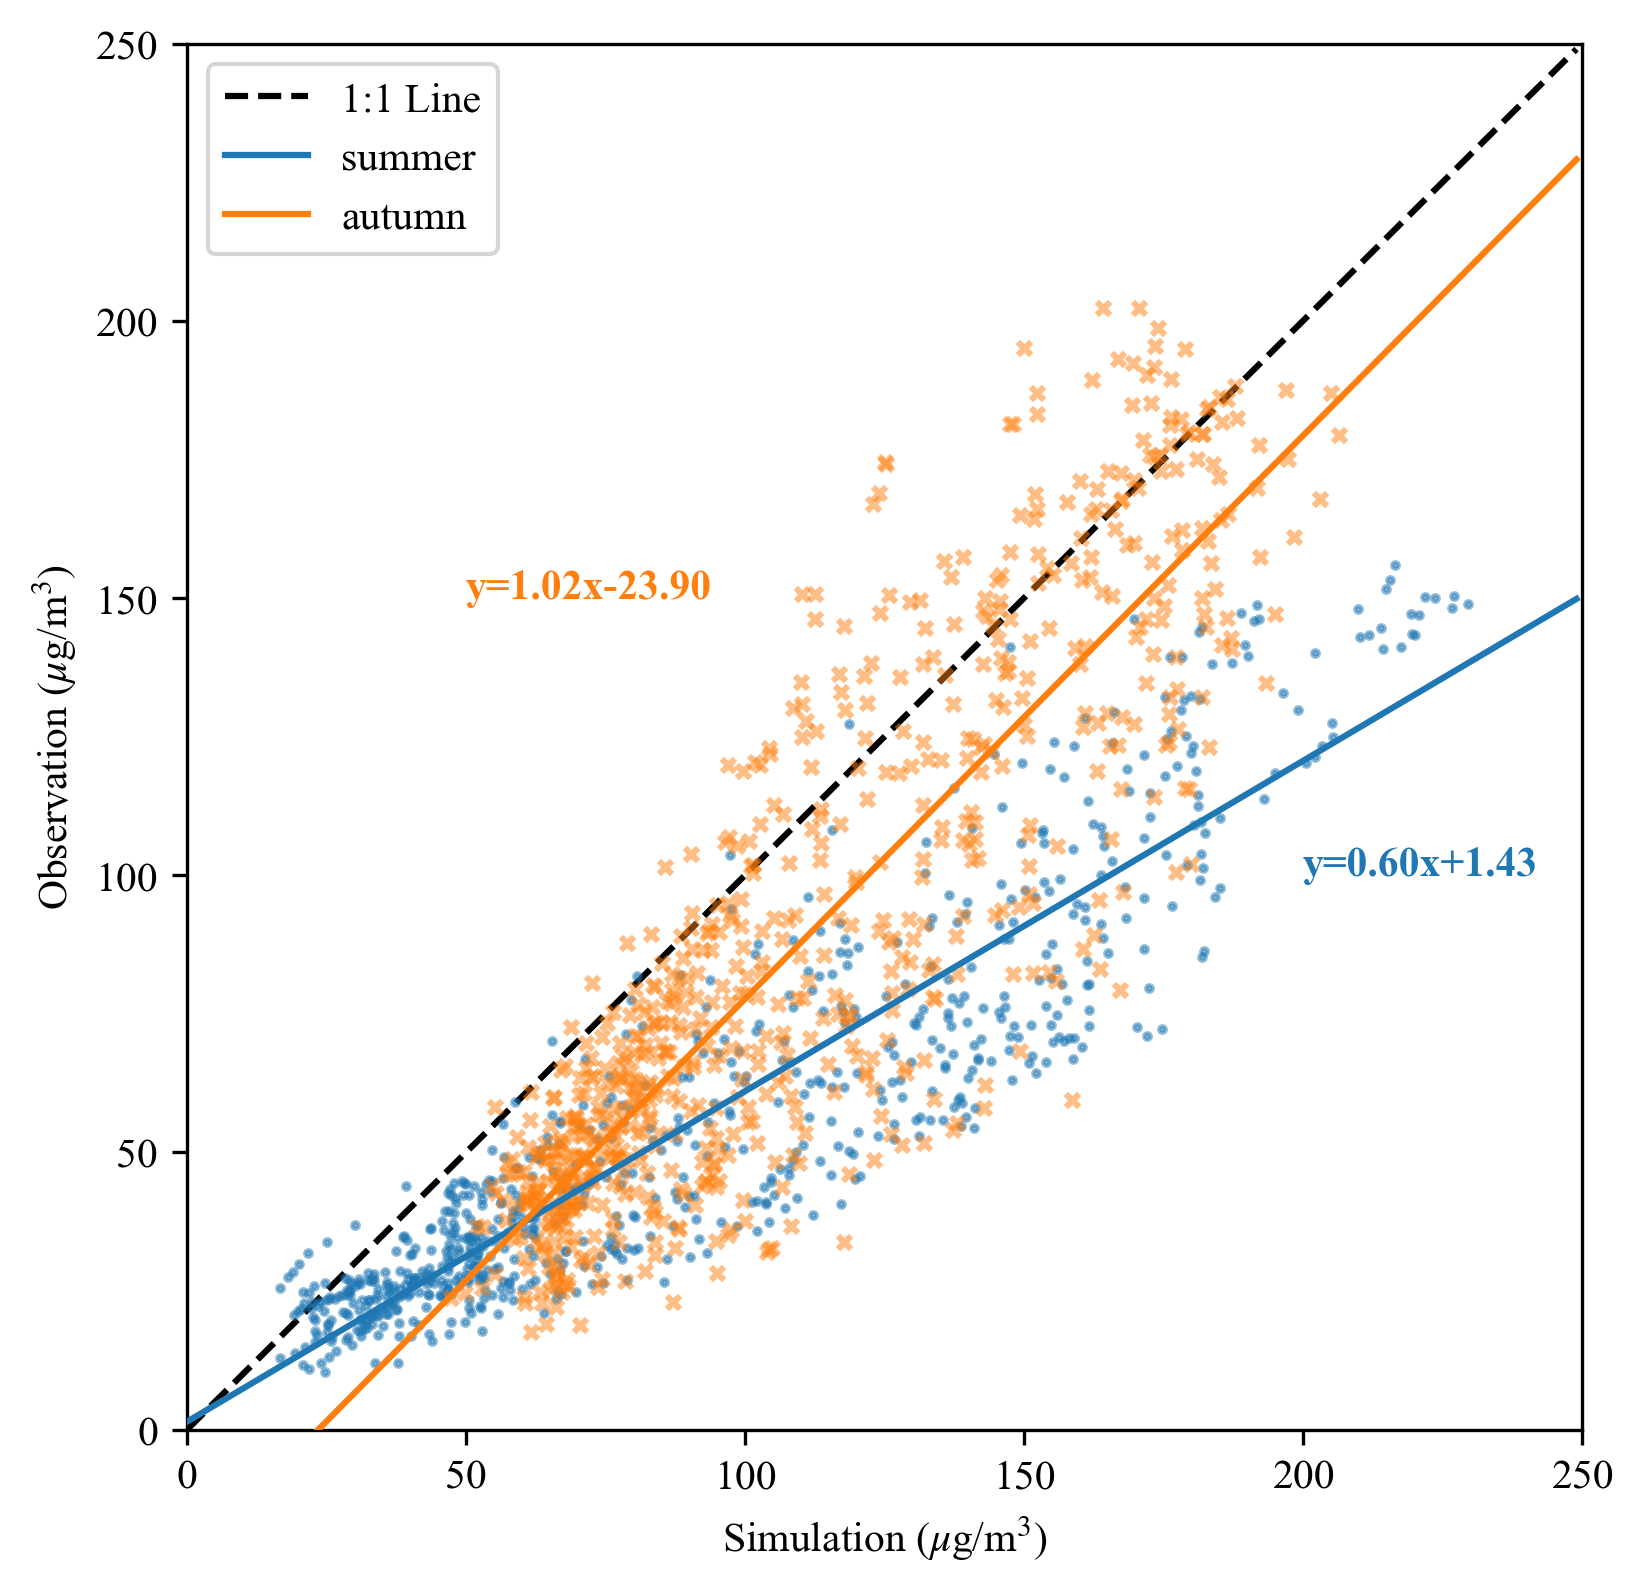

In [51]:
strdict = {'weight':'bold'}

fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
slope = lr['summer']['slope']
intercept = lr['summer']['intercept']
ax.plot(np.arange(0,250),slope*np.arange(0,250)+intercept,color='tab:blue',zorder=4,label='summer')
ax.text(200,100,s=f'y={slope:.2f}x+{intercept:.2f}',color='tab:blue',fontdict=strdict)
slope = lr['autumn']['slope']
intercept = lr['autumn']['intercept']
ax.plot(np.arange(0,250),slope*np.arange(0,250)+intercept,color='tab:orange',zorder=4,label='autumn')
ax.text(50,150,s=f'y={slope:.2f}x{intercept:.2f}',color='tab:orange',fontdict=strdict)

ax.scatter(sim_summer.values, obs_summer.values,color='tab:blue',s=10, marker='.',alpha=0.5)
ax.scatter(sim_autumn.values, obs_autumn.values,color='tab:orange',s=10, marker='x',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

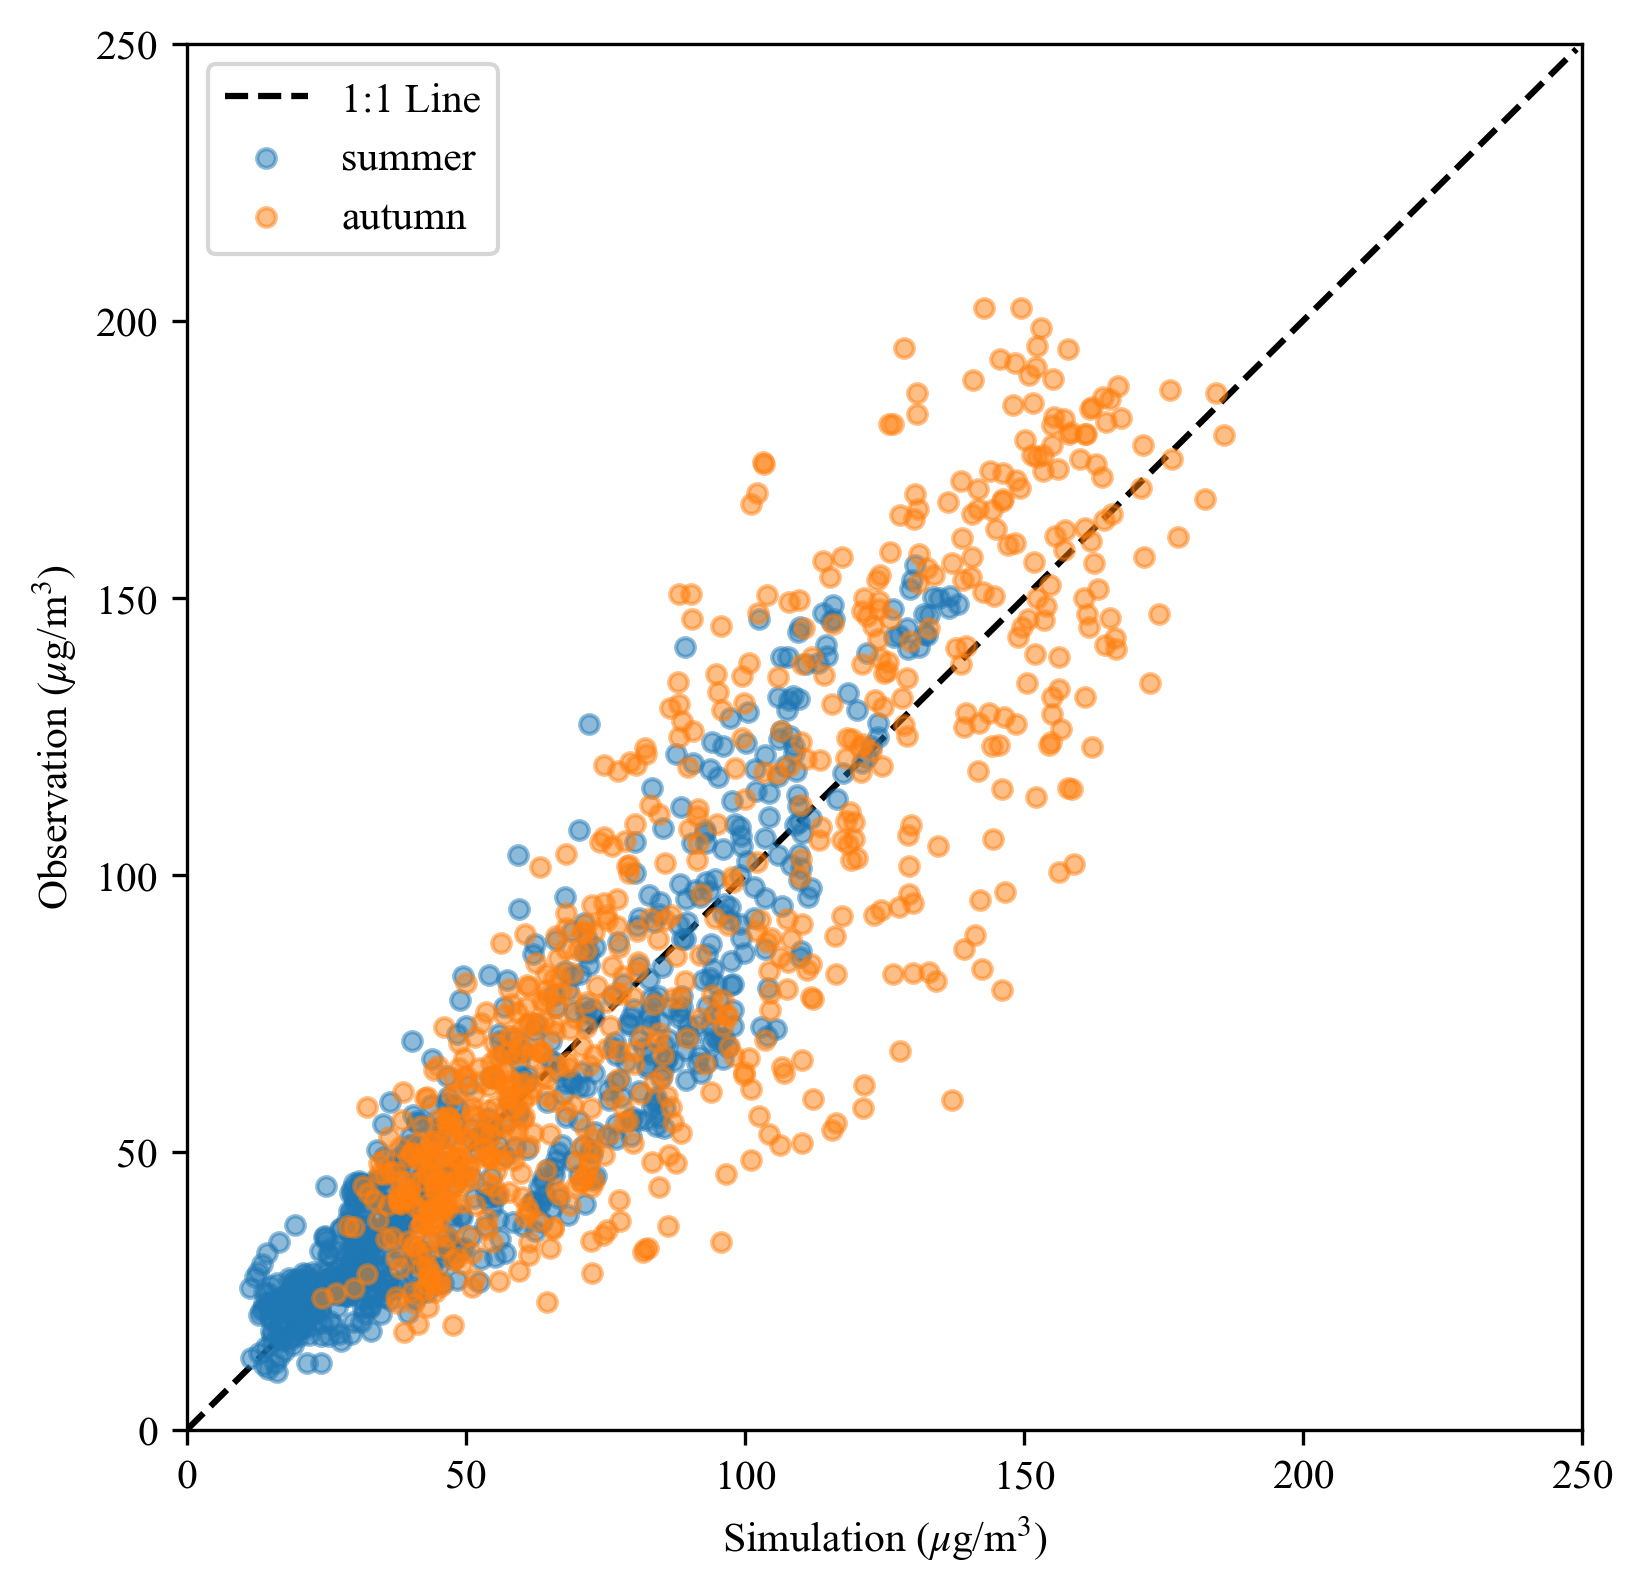

In [43]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')

slope = lr['summer']['slope']
intercept = lr['summer']['intercept']
ax.scatter(sim_summer.values*slope+intercept, obs_summer.values,label='summer',color='tab:blue',s=20, marker='o',alpha=0.5)
slope = lr['autumn']['slope']
intercept = lr['autumn']['intercept']
ax.scatter(sim_autumn.values*slope+intercept, obs_autumn.values,label='autumn',color='tab:orange',s=20, marker='o',alpha=0.5)

ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.set_xlabel('Simulation ($\mu$g/m$^3$)')
ax.set_ylabel('Observation ($\mu$g/m$^3$)')
ax.legend()
plt.show()

目前结果不够理想，主要原因是summer的模拟结果偏高太多了\
下面对summer用summer的回归，autumn用autumn的回归，sen用summer的回归（考虑是因为summer的排放源导致偏高，所以这里用summer回归）

In [56]:
obs_summer_value = avg_summer[obs_list].mean()
obs_autumn_value = avg_autumn[obs_list].mean()

slope            = lr['summer']['slope']
intercept        = lr['summer']['intercept']
sim_summer_value = avg_summer[sim_list].mean() * slope + intercept
sen_autumn_value = avg_sensit[sen_list].mean() * slope + intercept

slope            = lr['autumn']['slope']
intercept        = lr['autumn']['intercept']
sim_autumn_value = avg_autumn[sim_list].mean() * slope + intercept

print('obs summer :',obs_summer_value)
print('obs autumn :',obs_autumn_value)
print('sim summer :',sim_summer_value)
print('sim autumn :',sim_autumn_value)
print('sen autumn :',sen_autumn_value)

obs summer : 94.60311566796946
obs autumn : 139.69457536321153
sim summer : 94.33817228403043
sim autumn : 137.9104302643268
sen autumn : 97.12470325288879


In [57]:
delta_obs      = obs_autumn_value - obs_summer_value
sen_del_summer = sen_autumn_value - sim_summer_value
autumn_del_sen = sim_autumn_value - sen_autumn_value

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(sen_del_summer),', {:.2f}%'.format(sen_del_summer/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(autumn_del_sen),', {:.2f}%'.format(autumn_del_sen/delta_obs*100))

ΔMET + ΔEMIS = 45.09 
ΔMET = 2.79 , 6.18% 
ΔEMIS = 40.79 , 90.45%


如果sen用autumn的回归，结果会不太好

### 输出计算的结果

In [64]:
obs_summer = avg_summer[obs_list].mean()
obs_autumn = avg_autumn[obs_list].mean()
sim_summer = avg_summer[sim_list].mean()
sim_autumn = avg_autumn[sim_list].mean()
sen_autumn = avg_sensit[sen_list].mean()

dfout = pd.DataFrame(
    index=['obs_summer','obs_autumn','sim_summer','sim_autumn','sen_autumn'],
    columns=['original','lr_by_summer','lr_by_autumn',],
)

dfout['original'] = [obs_summer,obs_autumn,sim_summer,sim_autumn,sen_autumn]
dfout['lr_by_summer'] = [np.nan,np.nan,sim_summer_value,np.nan,sen_autumn_value]
dfout['lr_by_autumn'] = [np.nan,np.nan,np.nan,sim_autumn_value,np.nan]
dfout

,original,lr_by_summer,lr_by_autumn
obs_summer,94.603116,NaN,NaN
obs_autumn,139.694575,NaN,NaN
sim_summer,155.885196,94.338172,NaN
sim_autumn,159.261713,NaN,137.91043
sen_autumn,160.560472,97.124703,NaN


In [65]:
dfout.to_excel('D:/data/Graduation/Contribution/lr_results_Seasonally.xlsx',index=True)